# Figures: data exploration
Code for several data figures for this project 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
from processings.format_data import compute_wind_speedxr

## Climatology
Test distribution hypothesis on ERA5 data, and visualize computed climatology

In [2]:
# utils 
def plot_map(lats, lons, data, name, cmap='viridis'):
    plt.figure(figsize=(20, 5))
    buffer = 0.01
    ax = plt.axes(projection=ccrs.PlateCarree())
    # Calculate extent with buffer to avoid identical limits
    lon_min, lon_max = lons.min(), lons.max()
    lat_min, lat_max = lats.min(), lats.max()
    extent = [lon_min, lon_max, lat_min, lat_max ]
    
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines()
    
    # Plot data
    im = ax.imshow(data, origin='lower', extent=[lon_min, lon_max+1.5, lat_min, lat_max], transform=ccrs.PlateCarree(), cmap=cmap)
    plt.colorbar(im, label=name, extend='both')
    ax.gridlines(draw_labels=True)
    plt.show()    

In [3]:
climato = xr.open_dataset("/home/majanvie/scratch/data/raw/obs/climato/1996_2017.nc")
climato

<xarray.Dataset>
Dimensions:                       (latitude: 121, longitude: 240, dayofyear: 366)
Coordinates:
  * latitude                      (latitude) float64 -90.0 -88.5 ... 88.5 90.0
  * longitude                     (longitude) float64 0.0 1.5 ... 357.0 358.5
  * dayofyear                     (dayofyear) int64 1 2 3 4 ... 363 364 365 366
Data variables:
    10m_u_component_of_wind_mean  (dayofyear, longitude, latitude) float32 ...
    10m_v_component_of_wind_mean  (dayofyear, longitude, latitude) float32 ...
    2m_temperature_mean           (dayofyear, longitude, latitude) float32 ...
    land_sea_mask_mean            (dayofyear, longitude, latitude) float32 ...
    10m_wind_speed_mean           (dayofyear, longitude, latitude) float32 ...
    10m_u_component_of_wind_std   (dayofyear, longitude, latitude) float32 ...
    10m_v_component_of_wind_std   (dayofyear, longitude, latitude) float32 ...
    2m_temperature_std            (dayofyear, longitude, latitude) float32 ...
    land_sea_mask_std             (dayofyear, longitude, latitude) float32 ...
    10m_wind_speed_std            (dayofyear, longitude, latitude) float32 ...

In [4]:
climato = climato.sel(dayofyear=1, latitude=48.8, longitude=182.3, method="nearest")
mu_temp, sigma_temp = climato["2m_temperature_mean"], climato["2m_temperature_std"]
mu_wind, sigma_wind = climato["10m_wind_speed_mean"], climato["10m_wind_speed_std"]


<xarray.Dataset>
Dimensions:                                           (time: 838)
Coordinates:
    latitude                                          float64 49.5
    longitude                                         float64 183.0
  * time                                              (time) datetime64[ns] 1...
Data variables:
    10m_u_component_of_wind                           (time) float32 dask.array<chunksize=(838,), meta=np.ndarray>
    10m_v_component_of_wind                           (time) float32 dask.array<chunksize=(838,), meta=np.ndarray>
    2m_temperature                                    (time) float32 dask.array<chunksize=(838,), meta=np.ndarray>
    low_vegetation_cover                              float32 dask.array<chunksize=(), meta=np.ndarray>
    high_vegetation_cover                             float32 dask.array<chunksize=(), meta=np.ndarray>
    standard_deviation_of_filtered_subgrid_orography  float32 dask.array<chunksize=(), meta=np.ndarray>
    land_sea_ma

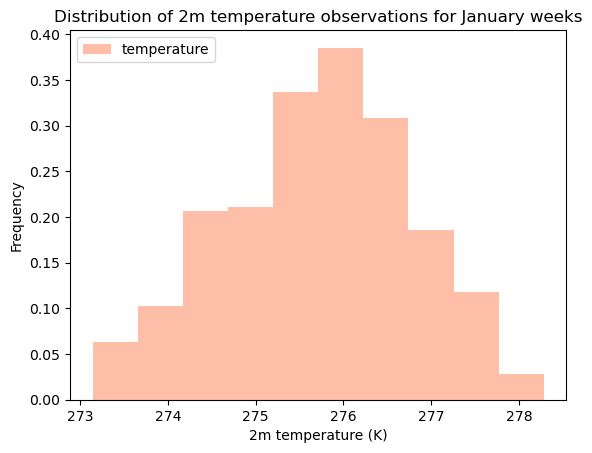

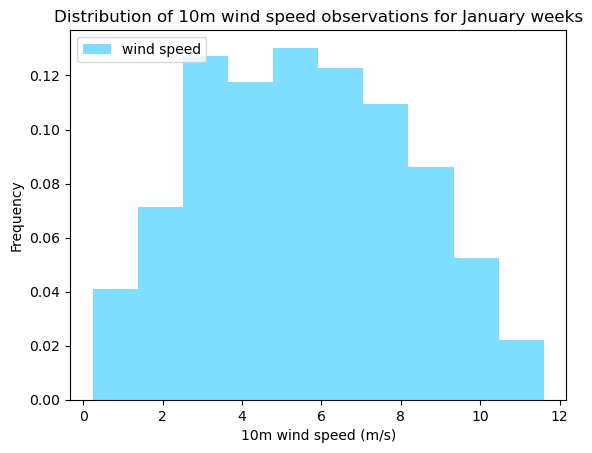

In [5]:
# hypothese de normalité sur one day of year 
# select date based on doy =1 
obs = xr.open_mfdataset("/home/majanvie/scratch/data/raw/obs/*.nc", combine='by_coords')
compute_wind_speedxr(obs, "obs")
obs = obs.sel(time=obs.time.dt.month == 1, latitude=48.8, longitude=182.3, method="nearest" ) # 838 samples paris
print(obs)
# temp 
plt.title("Distribution of 2m temperature observations for January weeks")
plt.hist(obs["2m_temperature"], bins=10, alpha=0.5, label='temperature', color="coral", density=True)
plt.legend(loc='upper left')
plt.xlabel("2m temperature (K)")
plt.ylabel("Frequency")
plt.show()
plt.title("Distribution of 10m wind speed observations for January weeks")
plt.hist(obs["10m_wind_speed"], bins=10, alpha=0.5, label='wind speed', color="deepskyblue", density=True)
plt.legend(loc='upper left')
plt.xlabel("10m wind speed (m/s)")
plt.ylabel("Frequency")
plt.show()

<xarray.Dataset>
Dimensions:                                           (time: 27)
Coordinates:
    latitude                                          float64 49.5
    longitude                                         float64 183.0
  * time                                              (time) datetime64[ns] 1...
Data variables:
    10m_u_component_of_wind                           (time) float32 dask.array<chunksize=(27,), meta=np.ndarray>
    10m_v_component_of_wind                           (time) float32 dask.array<chunksize=(27,), meta=np.ndarray>
    2m_temperature                                    (time) float32 dask.array<chunksize=(27,), meta=np.ndarray>
    low_vegetation_cover                              float32 dask.array<chunksize=(), meta=np.ndarray>
    high_vegetation_cover                             float32 dask.array<chunksize=(), meta=np.ndarray>
    standard_deviation_of_filtered_subgrid_orography  float32 dask.array<chunksize=(), meta=np.ndarray>
    land_sea_mask  

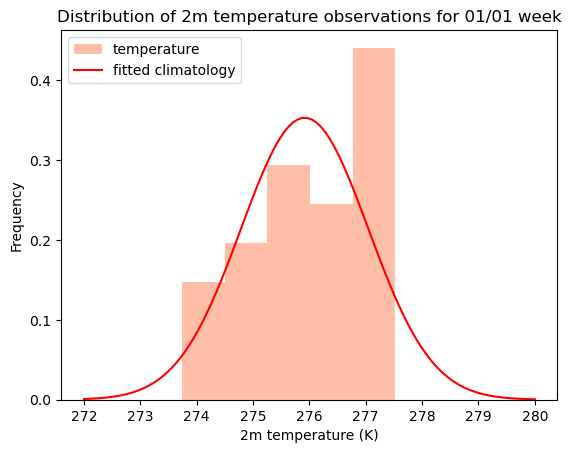

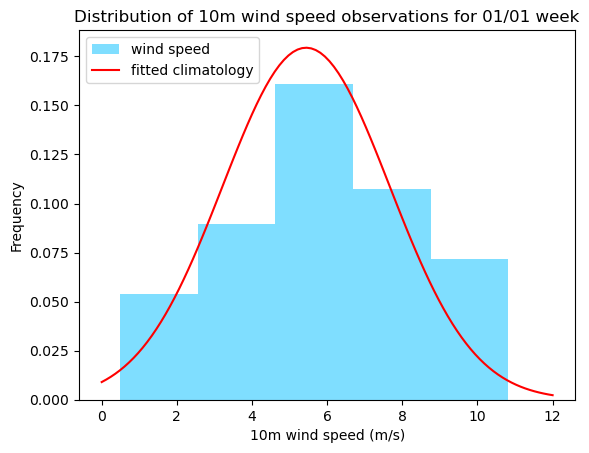

In [6]:
from scipy.stats import norm
obs = xr.open_mfdataset("/home/majanvie/scratch/data/raw/obs/*.nc", combine='by_coords')
compute_wind_speedxr(obs, "obs")
obs = obs.sel(time=obs.time.dt.dayofyear == 1, latitude=48.8, longitude=182.3, method="nearest" ) # 27 examples 
print(obs)
# temp 
plt.title("Distribution of 2m temperature observations for 01/01 week")
plt.hist(obs["2m_temperature"], bins=5, alpha=0.5, label='temperature', color="coral", density=True)
# plot fitted normal distribution
plt.plot(np.linspace(272, 280, 100), norm.pdf(np.linspace(272, 280, 100), mu_temp, sigma_temp), color="red", label="fitted climatology")
plt.legend(loc='upper left')
plt.xlabel("2m temperature (K)")
plt.ylabel("Frequency")
plt.show()
plt.title("Distribution of 10m wind speed observations for 01/01 week")
plt.hist(obs["10m_wind_speed"], bins=5, alpha=0.5, label='wind speed', color="deepskyblue", density=True)
# plot fitted normal distribution
plt.plot(np.linspace(0, 12, 100), norm.pdf(np.linspace(0, 12, 100), mu_wind, sigma_wind), color="red", label="fitted climatology")
plt.legend(loc='upper left')
plt.xlabel("10m wind speed (m/s)")
plt.ylabel("Frequency")
plt.show()

## Visualize ERA5
Observe our targets

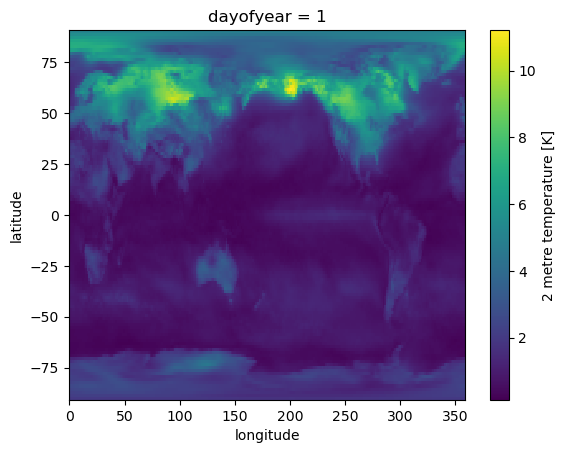

In [17]:
climato = xr.open_dataset("/home/majanvie/scratch/data/raw/obs/climato/1996_2017.nc")
climato["2m_temperature_std"].sel(dayofyear=1).T.plot()

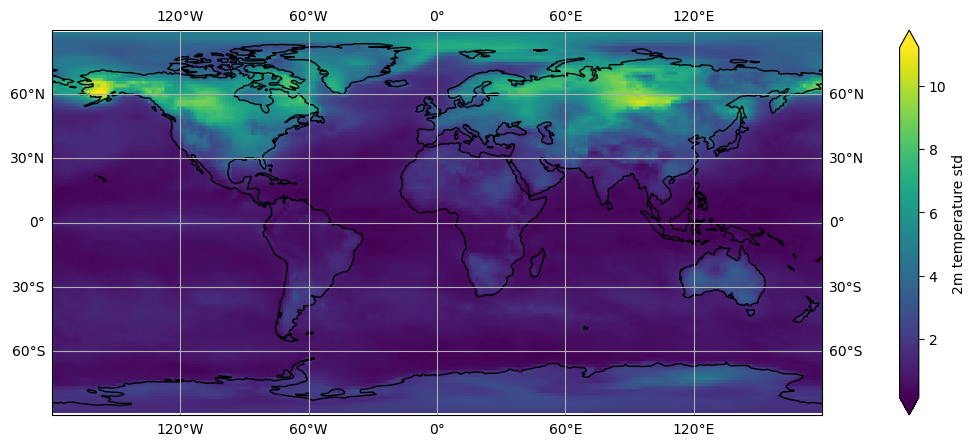

In [21]:
plot_map(climato.latitude, climato.longitude, climato["2m_temperature_std"].sel(dayofyear=1).T, "2m temperature std")

## Temperature trends (IFS and ERA5)
Visualize data trends, increasing bias and learned linear trends 

(28, 240, 121)


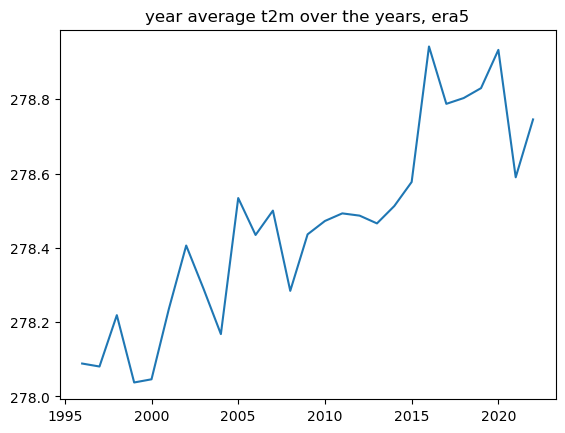

In [7]:
# trends
# plot mean per year
obs = xr.open_mfdataset("/home/majanvie/scratch/data/raw/obs/*.nc", combine='by_coords')
compute_wind_speedxr(obs, "obs")
years = obs["2m_temperature"].groupby(obs.time.dt.year).mean().year.values
temp_year = obs["2m_temperature"].groupby(obs.time.dt.year).mean().values 
print(temp_year.shape)
plt.plot(years[:-1],temp_year.mean(axis=(1,2))[:-1])
plt.title("year average t2m over the years, era5")
plt.show()

In [8]:
data = xr.open_zarr("gs://weatherbench2/datasets/ifs_extended_range/weekly/ifs-ext-reforecast-full-single-level-weekly_avg.zarr")
data = data["2m_temperature"].isel(prediction_timedelta=0).mean(dim="number")
years = data.groupby(data.time.dt.year).mean().year.values
print(years)
temp = data.groupby(data.time.dt.year).mean().values

[1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


Text(0.5, 1.0, 'Evolution of 2m temperature world mean across the years')

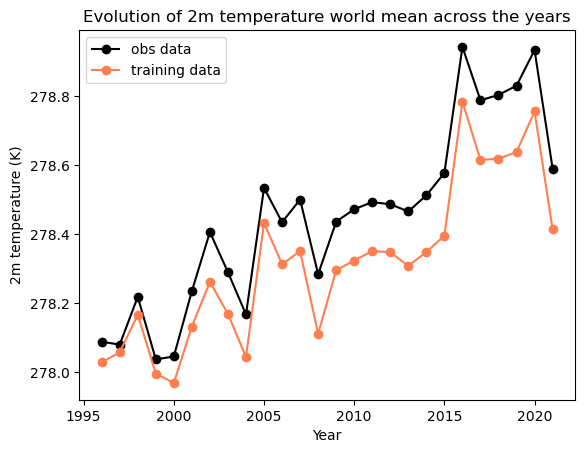

In [9]:
plt.plot(years,temp_year.mean(axis=(1,2))[:-2], label="obs data", color="black", marker="o")
plt.plot(years,temp.mean(axis=(0,1)), label="training data", color="coral", marker="o")
plt.xlabel("Year")
plt.ylabel("2m temperature (K)")
plt.legend()
plt.title("Evolution of 2m temperature world mean across the years")

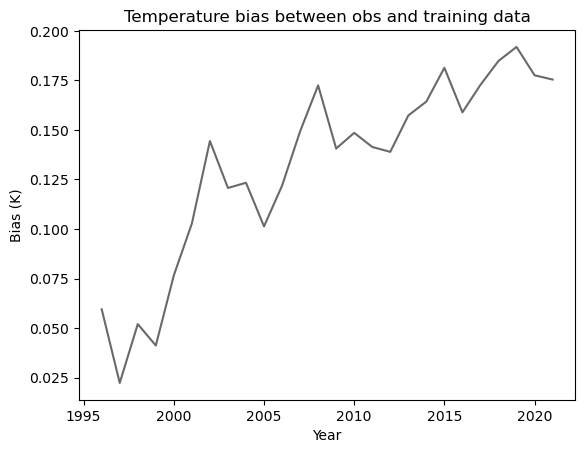

In [15]:
plt.plot(years, temp_year.mean(axis=(1,2))[:-2] - temp.mean(axis=(0,1)), color='dimgrey')
plt.title("Temperature bias between obs and training data")
plt.xlabel("Year")
plt.ylabel("Bias (K)")
plt.show()

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# fit linear trend
obs = xr.open_mfdataset("/home/majanvie/scratch/data/raw/obs/*.nc", combine='by_coords')
truth = obs["2m_temperature"]
times = truth.time.values
truth = truth.values
num_times = np.array(pd.to_datetime(times).astype(np.int64)) * 1e-9 # in seconds for stability
model = LinearRegression()
model.fit(num_times.reshape(-1,1), truth.reshape(truth.shape[0], -1))



LinearRegression()

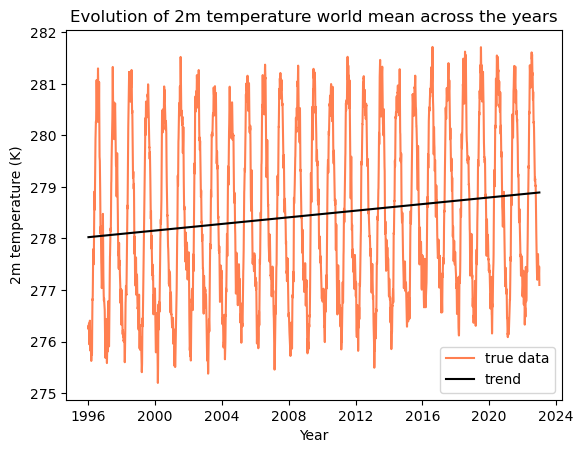

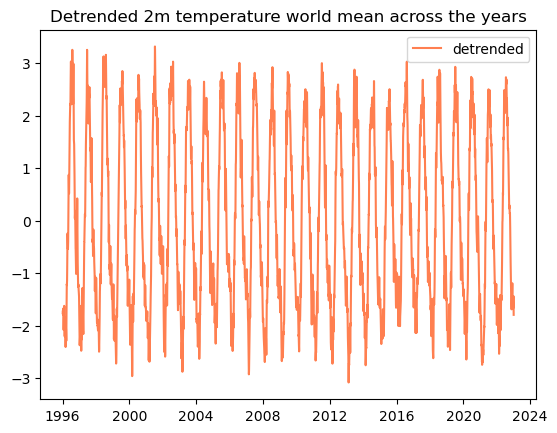

In [6]:
# plot true data and trend and detrended
plt.plot(times, truth.mean(axis=(1,2)), label="true data", color="coral")
plt.plot(times, model.predict(num_times.reshape(-1,1)).mean(axis=1), label="trend", color="black")
plt.legend()
plt.xlabel("Year")
plt.ylabel("2m temperature (K)")
plt.title("Evolution of 2m temperature world mean across the years")
plt.show()
plt.figure()
plt.plot(times, truth.mean(axis=(1,2)) - model.predict(num_times.reshape(-1,1)).mean(axis=1), label="detrended", color="coral")
plt.legend()
plt.title("Detrended 2m temperature world mean across the years")
plt.show()

## CRPSS weighting maps
Land sea mask and latitude weighting used in computation of mean CRPSS 

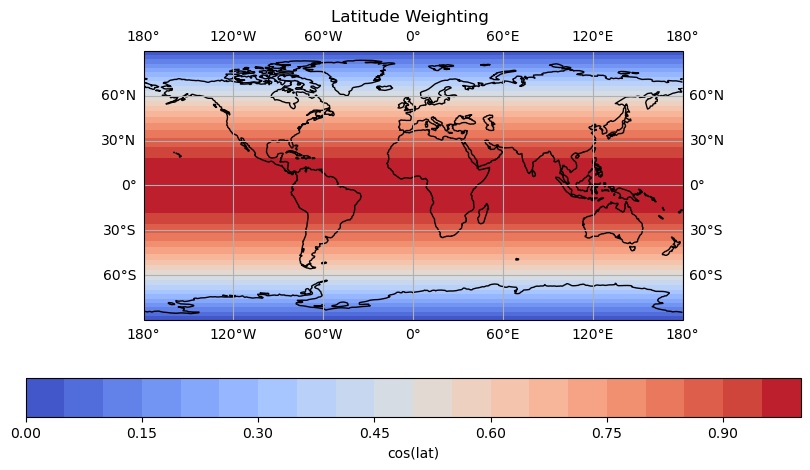

In [1]:
# weighting latitude 
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

latitudes = np.linspace(-90, 90, 121)
weights = np.cos(np.radians(latitudes))
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

longitudes = np.linspace(0, 360, 240)
weights_2d = np.tile(weights[:, np.newaxis], (1, longitudes.size))

# plot latitude weighting 
lat_grid, lon_grid = np.meshgrid(latitudes, longitudes, indexing='ij')
contour = ax.contourf(lon_grid, lat_grid, weights_2d, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=20)
# plot gridlines
ax.gridlines(draw_labels=True)

# colorbar and title
plt.colorbar(contour, orientation='horizontal', label='cos(lat)')
plt.title('Latitude Weighting ')
plt.show()


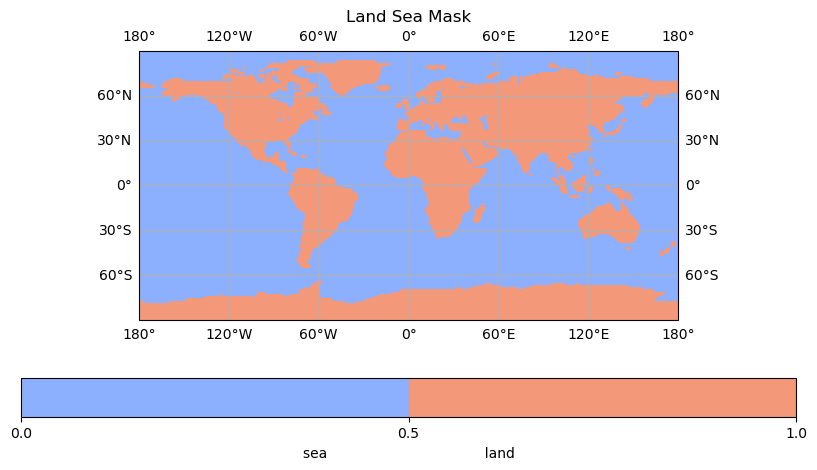

In [18]:
# land sea mask 
import xarray as xr

land_sea_mask = xr.open_dataset("/home/majanvie/scratch/data/raw/obs/land_sea_mask.nc")["land_sea_mask"].values.T
land_sea_mask = land_sea_mask > 0.5

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

longitudes = np.linspace(0, 360, 240)

# plot the latitude weighting function (cos(lat)) on the map
lat_grid, lon_grid = np.meshgrid(latitudes, longitudes, indexing='ij')
contour = ax.contourf(lon_grid, lat_grid, land_sea_mask, transform=ccrs.PlateCarree(), cmap='coolwarm')
# plot gridlines
ax.gridlines(draw_labels=True)

# add color legend of mask
plt.colorbar(contour, orientation='horizontal', label='sea                                    land', cmap=cmap)

#plt.colorbar(contour, orientation='horizontal', label='land sea mask')
plt.title('Land Sea Mask')
plt.show()


